In [40]:
import pandas as pd 
pd.set_option('display.max_column',None)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson

In [41]:
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Machine Learning\\Decision Tree\\auto_pricing\\Auto_Pricing.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [43]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<AxesSubplot:>

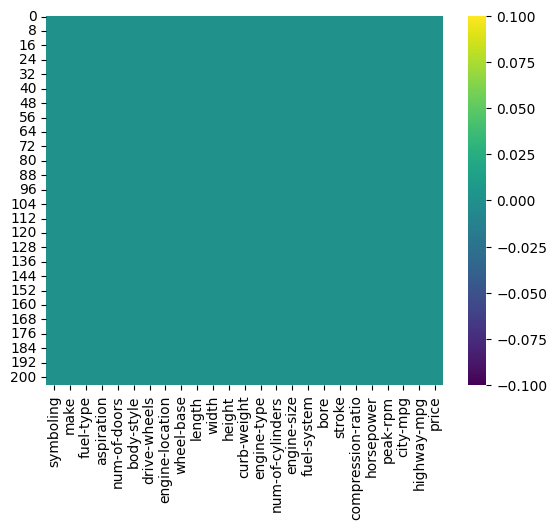

In [44]:
sns.heatmap(df.isnull(), cmap = "viridis")

In [45]:
list(df)

['symboling',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [46]:
data = df.loc[:,["fuel-type", "length", "curb-weight", "horsepower", "price"]]

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel-type    205 non-null    object 
 1   length       205 non-null    float64
 2   curb-weight  205 non-null    int64  
 3   horsepower   205 non-null    object 
 4   price        205 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.1+ KB


# price

In [48]:
data[data.price == "?"]

,fuel-type,length,curb-weight,horsepower,price
9,gas,178.2,3053,160,?
44,gas,155.9,1874,70,?
45,gas,155.9,1909,70,?
129,gas,175.7,3366,288,?


In [49]:
data = data.drop([9,44,45,129])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution: price')

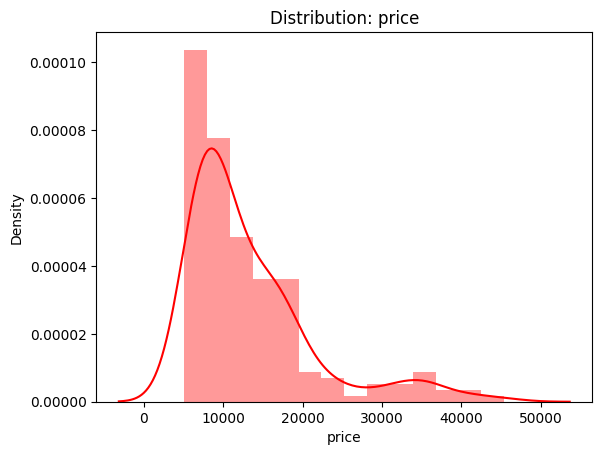

In [50]:
sns.distplot(data.price, color = "red")
plt.title("Distribution: price")

Text(0.5, 1.0, 'Boxplot: price')

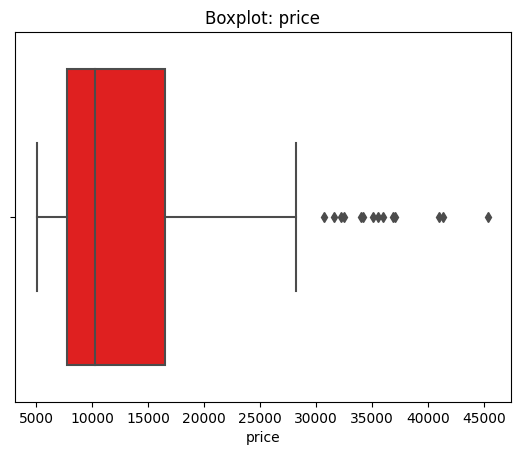

In [51]:
data["price"] = data["price"].astype("float64")
sns.boxplot(x = data.price, color = "red", orient = "h")
plt.title("Boxplot: price")

# horsepower

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution: horsepower')

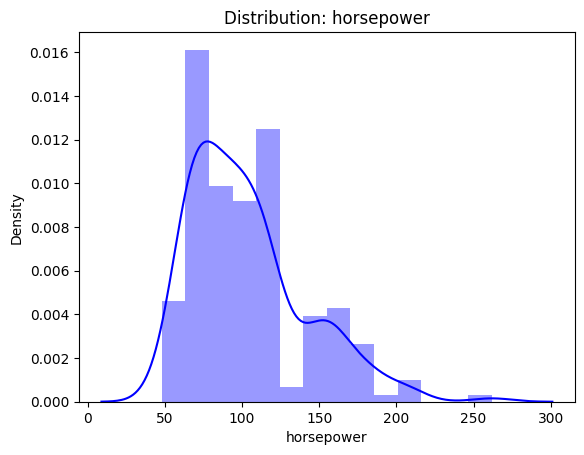

In [52]:
data[data.horsepower == "?"]
data = data.drop([130, 131])
sns.distplot(data.horsepower, color = "blue")
plt.title("Distribution: horsepower")

Text(0.5, 1.0, 'Boxplot: horsepower')

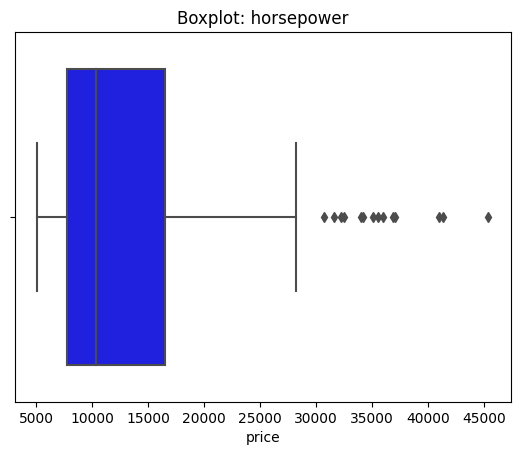

In [53]:
data["horsepower"] = data["horsepower"].astype("float64")
sns.boxplot(x = data.price, color = "blue", orient = "h")
plt.title("Boxplot: horsepower")

Text(0.5, 1.0, 'price ~ horsepower')

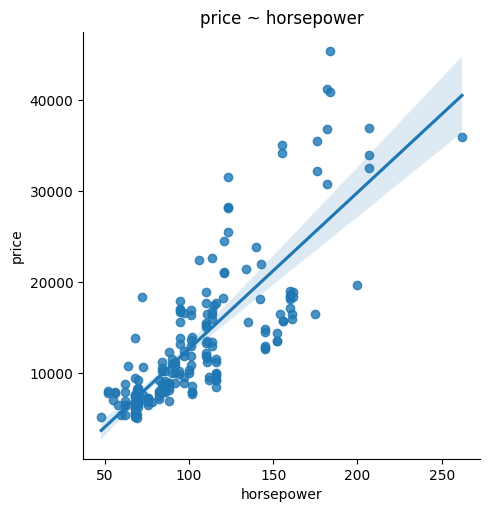

In [54]:
sns.lmplot(x = "horsepower", y = "price", data = data, fit_reg = True)
plt.title("price ~ horsepower")

In [55]:
np.corrcoef(data.price, data.horsepower)

array([[1.        , 0.81053308],
       [0.81053308, 1.        ]])

# length

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution: length')

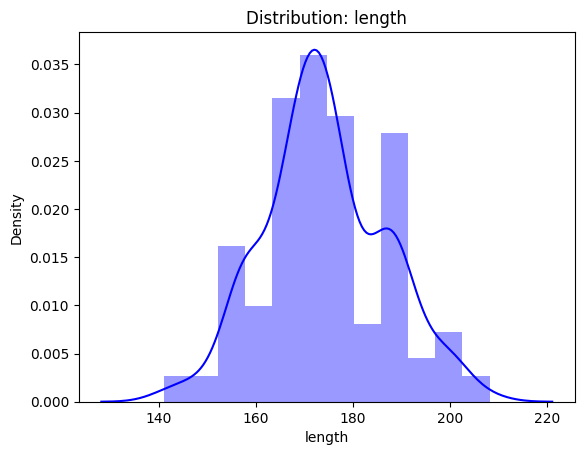

In [56]:
sns.distplot(data.length, color = "blue")
plt.title("Distribution: length")

Text(0.5, 1.0, 'Boxplot: length')

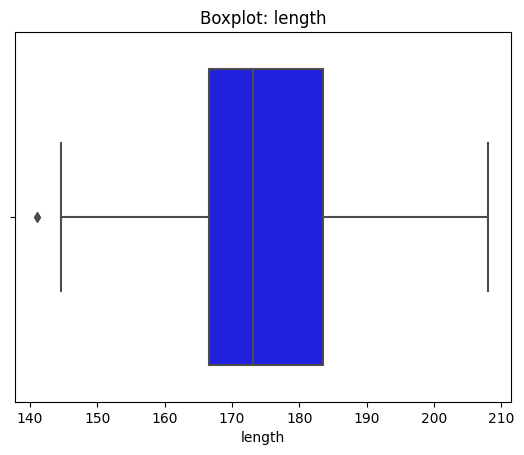

In [57]:
sns.boxplot(x = data.length, color = "blue", orient = "h")
plt.title("Boxplot: length")

Text(0.5, 1.0, 'price ~ length')

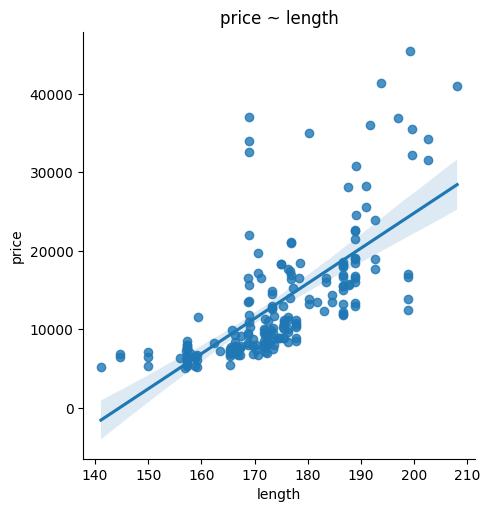

In [58]:
sns.lmplot(x = "length", y = "price", data = data, fit_reg = True)
plt.title("price ~ length")

In [59]:
np.corrcoef(data.price, data.length)

array([[1.        , 0.69396477],
       [0.69396477, 1.        ]])

# curb-weight

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution: curbweight')

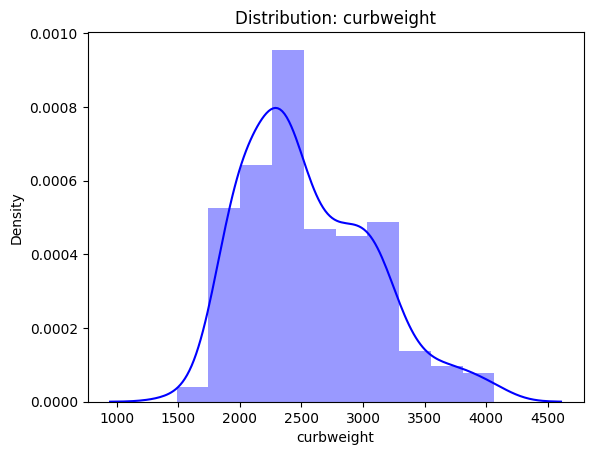

In [60]:
# need to change the curb-weight and fuel-type
data = data.rename(columns = {"curb-weight":"curbweight","fuel-type":"fueltype"})
sns.distplot(data.curbweight, color = "blue")
plt.title("Distribution: curbweight")


Text(0.5, 1.0, 'Boxplot: curbweight')

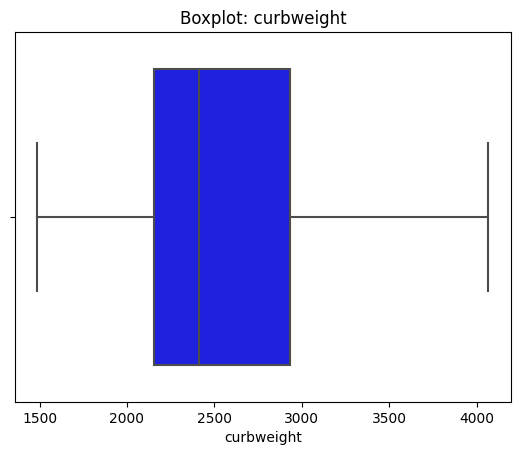

In [61]:
sns.boxplot(x = data.curbweight, color = "blue", orient = "h")
plt.title("Boxplot: curbweight")

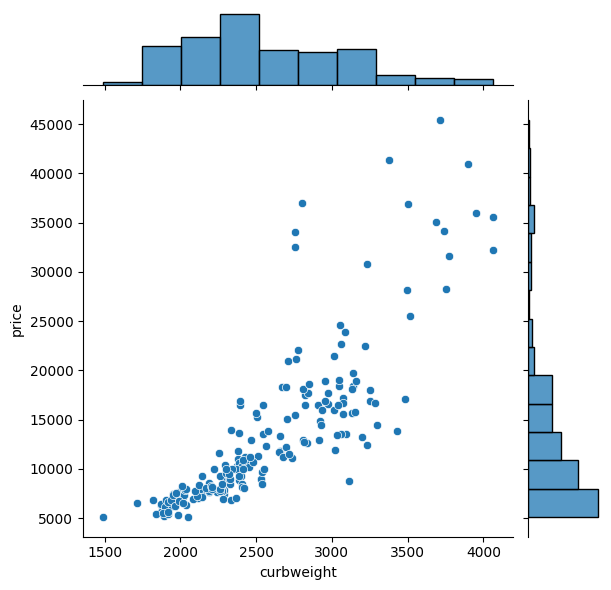

In [62]:
sns.jointplot(x = 'curbweight', y = 'price', data = data)

In [63]:
np.corrcoef(data.price, data.curbweight)

array([[1.        , 0.83509045],
       [0.83509045, 1.        ]])

# correlations

              length  curbweight  horsepower     price
length      1.000000    0.881688    0.580309  0.693965
curbweight  0.881688    1.000000    0.758063  0.835090
horsepower  0.580309    0.758063    1.000000  0.810533
price       0.693965    0.835090    0.810533  1.000000


<AxesSubplot:>

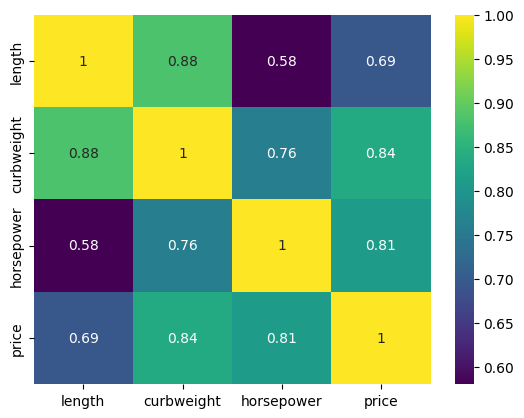

In [64]:
print(data.corr())
sns.heatmap(data.corr(), annot =True, cmap = "viridis")

# fueltype

In [65]:
data.fueltype.value_counts()

gas       179
diesel     20
Name: fueltype, dtype: int64

Text(0.5, 1.0, 'fueltype')

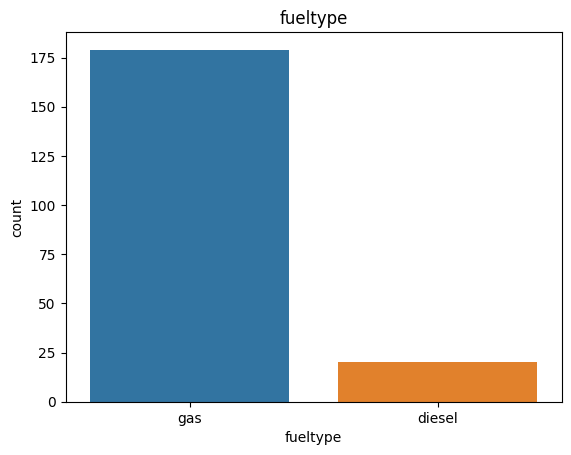

In [66]:
sns.countplot(x = data.fueltype, data = data)
plt.title("fueltype")

# pairplot

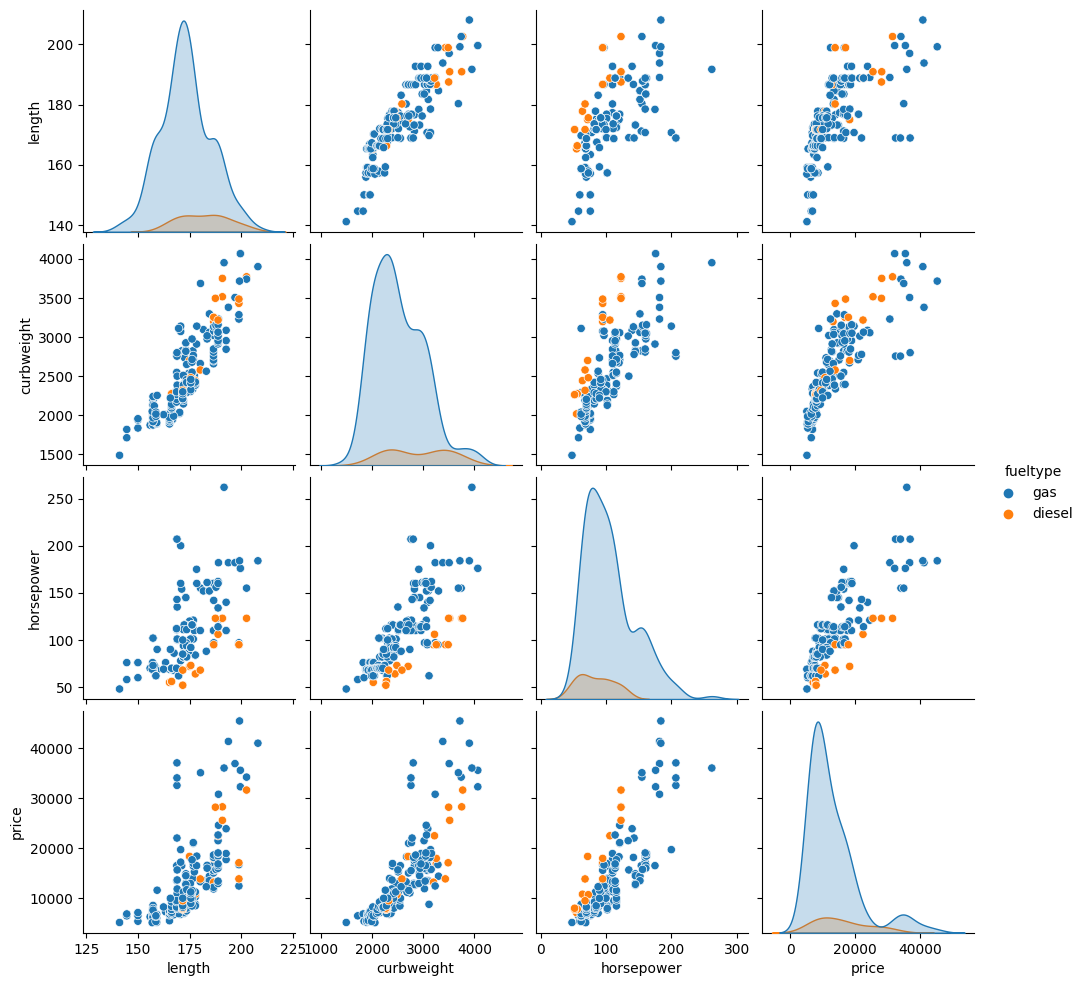

In [67]:
sns.pairplot(data, hue = "fueltype")

In [68]:
# better to save this data
#df = data.to_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Machine Learning\\Decision Tree\\autopriceTree.csv")

# New Data

In [69]:
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Machine Learning\\Decision Tree\\auto_pricing\\autopriceTree.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  199 non-null    int64  
 1   fueltype    199 non-null    object 
 2   length      199 non-null    float64
 3   curbweight  199 non-null    int64  
 4   horsepower  199 non-null    float64
 5   price       199 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.5+ KB


In [71]:
# before proceeding further label fueltype 
# need to label them as 0 and 1
df["fueltype"] = df.get("fueltype").replace("diesel", 0)
df["fueltype"] = df.get("fueltype").replace("gas", 1)

In [72]:
# X and y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  199 non-null    int64  
 1   fueltype    199 non-null    int64  
 2   length      199 non-null    float64
 3   curbweight  199 non-null    int64  
 4   horsepower  199 non-null    float64
 5   price       199 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 9.5 KB


In [73]:
#df.drop(["Unnamed: 0"], axis = 1 , indepth = True)

In [74]:
X = df.drop("price", axis = 1) 
y = df["price"]

# Fit Tree

In [75]:
# train tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 45)

In [76]:
# fit tree on train data
# model
regr = DecisionTreeRegressor()

# Fit regression model on train set
regr.fit(X_train, y_train)

# predict/estimate , X_train
yest_train = regr.predict(X_train)

[Text(0.6358675373134328, 0.96875, 'X[3] <= 2697.5\nsquared_error = 65244962.258\nsamples = 159\nvalue = 12991.075'),
 Text(0.36427238805970147, 0.90625, 'X[3] <= 2291.5\nsquared_error = 5817185.634\nsamples = 104\nvalue = 8626.779'),
 Text(0.23348880597014926, 0.84375, 'X[3] <= 2087.5\nsquared_error = 1533560.783\nsamples = 60\nvalue = 7169.5'),
 Text(0.13078358208955224, 0.78125, 'X[2] <= 160.75\nsquared_error = 638424.441\nsamples = 38\nvalue = 6496.921'),
 Text(0.08694029850746268, 0.71875, 'X[4] <= 69.5\nsquared_error = 322827.456\nsamples = 23\nvalue = 6068.609'),
 Text(0.05447761194029851, 0.65625, 'X[2] <= 157.1\nsquared_error = 320038.349\nsamples = 19\nvalue = 5964.421'),
 Text(0.026865671641791045, 0.59375, 'X[2] <= 147.3\nsquared_error = 307741.188\nsamples = 4\nvalue = 5536.75'),
 Text(0.014925373134328358, 0.53125, 'X[3] <= 1600.5\nsquared_error = 440896.0\nsamples = 2\nvalue = 5815.0'),
 Text(0.008955223880597015, 0.46875, 'squared_error = 0.0\nsamples = 1\nvalue = 5151.

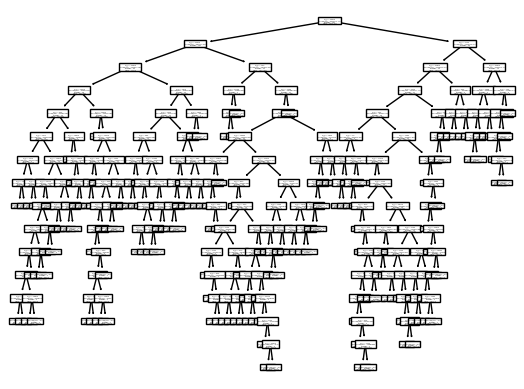

In [77]:
# see tree_train
from sklearn import tree
tree.plot_tree(regr.fit(X_train, y_train)) # 13 deep

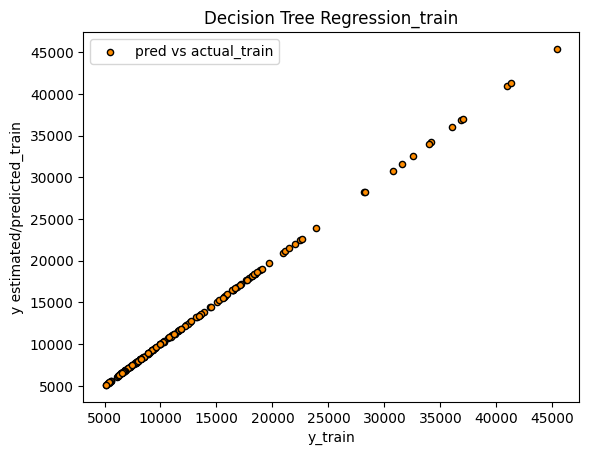

In [78]:
# trian data, 13 deep
# plot the result; Looks tree has learnt everything
plt.figure()
plt.scatter(y_train, yest_train, s=20, edgecolor = "black", c = "darkorange", label = "pred vs actual_train")
plt.xlabel("y_train")
plt.ylabel("y estimated/predicted_train")
plt.title("Decision Tree Regression_train")
plt.legend()
plt.show()

In [79]:
# look at the MSE value of the train and test , HUGE!
# mse/rmse_train
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, yest_train)
print(mse_train)

0.0


In [80]:
# mse @ test
from sklearn.metrics import mean_squared_error
yest_test = regr.predict(X_test)
# residual test
test_residual = y_test - yest_test

# mse/rmse_test
mse_test = mean_squared_error(y_test, yest_test)
print(mse_test)

16000047.3


In [81]:
# find optimum number of depth
depth = [5,6,7,8,9,10,11]
mse_train, mse_test = [],[]

for i in depth:
    prdctr = DecisionTreeRegressor(max_depth = i)
    prdctr.fit(X_train, y_train)
    y_train_pred = prdctr.predict(X_train)
    y_test_pred = prdctr.predict(X_test)
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

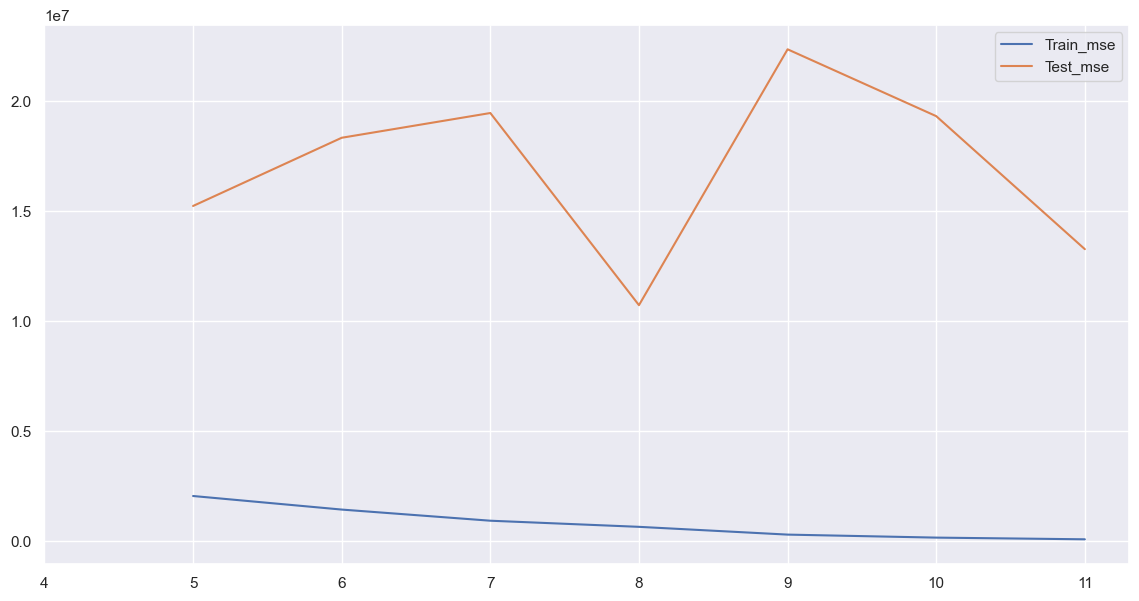

In [82]:
# now we have mses
#let's plot
sns.set()
plt.figure(figsize=(14, 7))
sns.lineplot(y = mse_train, x = depth, label = "Train_mse")
sns.lineplot(y = mse_test, x = depth, label = "Test_mse")
plt.xticks(ticks = np.arange(4,12,1))
plt.show()

# and now we can go ahead and finalize your tree with 6 deep

In [83]:
# fit tree on train data
# model
regr = DecisionTreeRegressor(max_depth=5)

# Fit regression model on train set
regr.fit(X_train, y_train)

# predict/estimate , X_train
yest_train = regr.predict(X_train)

[Text(0.5117924528301887, 0.9166666666666666, 'X[3] <= 2697.5\nsquared_error = 65244962.258\nsamples = 159\nvalue = 12991.075'),
 Text(0.27358490566037735, 0.75, 'X[3] <= 2291.5\nsquared_error = 5817185.634\nsamples = 104\nvalue = 8626.779'),
 Text(0.1509433962264151, 0.5833333333333334, 'X[3] <= 2087.5\nsquared_error = 1533560.783\nsamples = 60\nvalue = 7169.5'),
 Text(0.07547169811320754, 0.4166666666666667, 'X[2] <= 160.75\nsquared_error = 638424.441\nsamples = 38\nvalue = 6496.921'),
 Text(0.03773584905660377, 0.25, 'X[4] <= 69.5\nsquared_error = 322827.456\nsamples = 23\nvalue = 6068.609'),
 Text(0.018867924528301886, 0.08333333333333333, 'squared_error = 320038.349\nsamples = 19\nvalue = 5964.421'),
 Text(0.05660377358490566, 0.08333333333333333, 'squared_error = 39596.75\nsamples = 4\nvalue = 6563.5'),
 Text(0.11320754716981132, 0.25, 'X[3] <= 1903.5\nsquared_error = 409732.756\nsamples = 15\nvalue = 7153.667'),
 Text(0.09433962264150944, 0.08333333333333333, 'squared_error = 0.

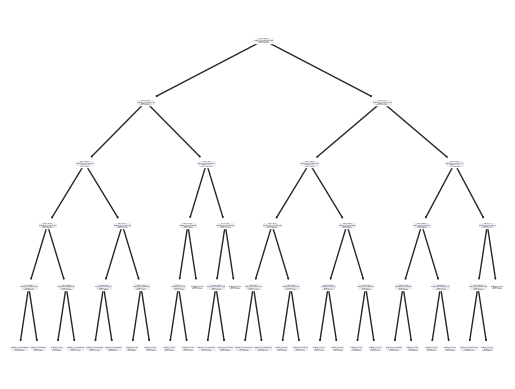

In [84]:
# see tree_train
from sklearn import tree
tree.plot_tree(regr.fit(X_train, y_train)) # 5 deep

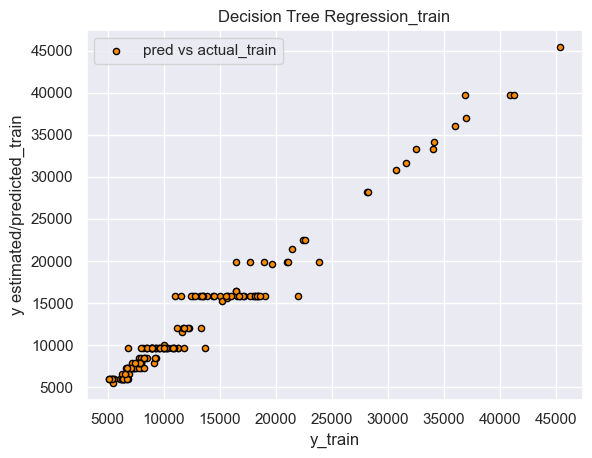

In [85]:
# trian data, 13 deep
# plot the result; Looks tree has learnt everything
plt.figure()
plt.scatter(y_train, yest_train, s=20, edgecolor = "black", c = "darkorange", label = "pred vs actual_train")
plt.xlabel("y_train")
plt.ylabel("y estimated/predicted_train")
plt.title("Decision Tree Regression_train")
plt.legend()
plt.show()

In [86]:
# mse @ test
from sklearn.metrics import mean_squared_error
yest_test = regr.predict(X_test)
# residual test
test_residual = y_test - yest_test

# mse/rmse_test
mse_test = mean_squared_error(y_test, yest_test)
print(mse_test)

18378925.9460742


In [88]:
tree=DecisionTreeRegressor(random_state=40,max_depth=5)
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)


print(round(mean_squared_error(y_train,y_train_pred),2))
print(round(mean_squared_error(y_test, y_test_pred),2))

2040739.95
11798450.55


In [89]:
print(np.sqrt(mean_squared_error(y_train,y_train_pred)))
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

1428.5446953362884
3434.8872683210725


# Random Forest Regression

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [92]:
d=pd.read_csv('autopriceTree.csv')
d

,Unnamed: 0,fueltype,length,curbweight,horsepower,price
0,0,gas,168.8,2548,111.0,13495.0
1,1,gas,168.8,2548,111.0,16500.0
2,2,gas,171.2,2823,154.0,16500.0
3,3,gas,176.6,2337,102.0,13950.0
4,4,gas,176.6,2824,115.0,17450.0
...,...,...,...,...,...,...
194,200,gas,188.8,2952,114.0,16845.0
195,201,gas,188.8,3049,160.0,19045.0
196,202,gas,188.8,3012,134.0,21485.0
197,203,diesel,188.8,3217,106.0,22470.0


In [94]:
d['fueltype']=d.get('fueltype').replace('diesel',0)
d['fueltype']=d.get('fueltype').replace('gas',1)

In [95]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  199 non-null    int64  
 1   fueltype    199 non-null    int64  
 2   length      199 non-null    float64
 3   curbweight  199 non-null    int64  
 4   horsepower  199 non-null    float64
 5   price       199 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 9.5 KB


In [96]:
x=d.iloc[:,1:5]
y=d.loc[:,'price']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fueltype    199 non-null    int64  
 1   length      199 non-null    float64
 2   curbweight  199 non-null    int64  
 3   horsepower  199 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 6.3 KB


In [97]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=123)

In [98]:
#import the regressor
from sklearn.ensemble import RandomForestRegressor

In [99]:
#create regressor object
regressor=RandomForestRegressor(n_estimators=100,max_depth=12,random_state=0)

In [100]:
#fit the regressor with x and y data=TRAIN
mod=regressor.fit(x_train,y_train)

In [101]:
#predition
y_pred=mod.predict(x_test)

In [102]:
from sklearn.metrics import mean_squared_error

In [103]:
mse=mean_squared_error(y_test,y_pred)
mse

6366918.390092103

In [104]:
RMSE=np.sqrt(mse)
RMSE

2523.275329822749

In [105]:
obsno=np.arange(60)
resid=y_test-y_pred

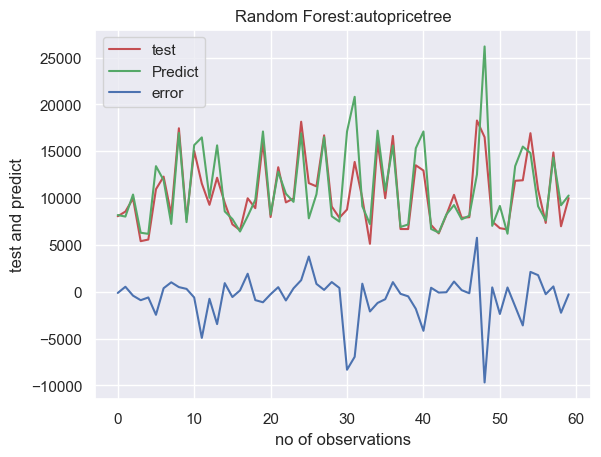

In [106]:
#plot
plt.plot(obsno,y_test,'r')
plt.plot(obsno,y_pred,'g')
plt.plot(obsno,resid,'b')
plt.xlabel('no of observations')
plt.ylabel('test and predict')
plt.title('Random Forest:autopricetree')
plt.legend(labels=('test','Predict','error'),loc='upper left')
plt.show()

In [107]:
#Extract Feature Importance
fi=pd.DataFrame({'feature':list(x_train.columns),'importance':mod.feature_importances_}).\
sort_values('importance',ascending=False)

In [108]:
fi.head()

,feature,importance
2,curbweight,0.646307
3,horsepower,0.309920
1,length,0.038514
0,fueltype,0.005258


In [109]:
#building model with only curbweight and horsepower

In [110]:
#import the regressor
from sklearn.ensemble import RandomForestRegressor

In [111]:
#create regressor object
regressor=RandomForestRegressor(n_estimators=100,max_depth=12,random_state=0)

In [112]:
#fit the regressor with x and y data=TRAIN
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 108 to 109
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fueltype    139 non-null    int64  
 1   length      139 non-null    float64
 2   curbweight  139 non-null    int64  
 3   horsepower  139 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 5.4 KB


In [113]:
x_train1=x_train.iloc[:,[2,3]]


In [114]:
x_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 108 to 109
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   curbweight  139 non-null    int64  
 1   horsepower  139 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


In [115]:
#SECOND MODEL
mod1=regressor.fit(x_train1,y_train)

In [116]:
#predition
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 157 to 182
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fueltype    60 non-null     int64  
 1   length      60 non-null     float64
 2   curbweight  60 non-null     int64  
 3   horsepower  60 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.3 KB


In [117]:
x_test1=x_test.iloc[:,[2,3]]


In [118]:
y_pred1=mod1.predict(x_test1)

In [119]:
mse1=mean_squared_error(y_test,y_pred1)
mse1

6778166.228886028

In [120]:
RMSE1=np.sqrt(mse1)
RMSE1

2603.4911616685063

In [121]:
obsno=np.arange(60)
resid1=y_test-y_pred1

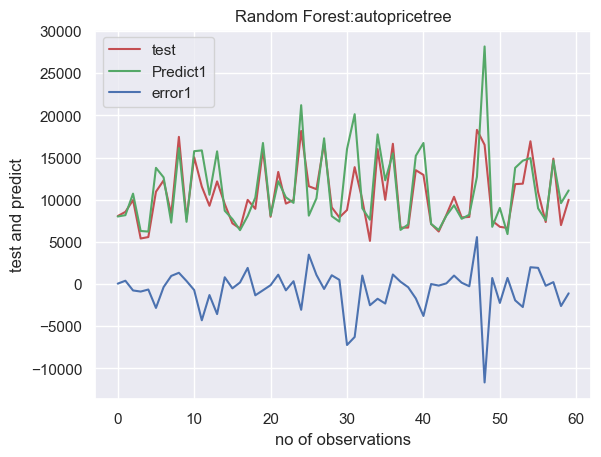

In [122]:
#plot
plt.plot(obsno,y_test,'r')
plt.plot(obsno,y_pred1,'g')
plt.plot(obsno,resid1,'b')
plt.xlabel('no of observations')
plt.ylabel('test and predict')
plt.title('Random Forest:autopricetree')
plt.legend(labels=('test','Predict1','error1'),loc='upper left')
plt.show()

# Grid search model:#3rd Model

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
param_grid={'bootstrap':[True],'max_depth':[5,6,7,8,9,10,11],'max_features':['auto','log2'],'n_estimators':[25,50,100,150,200]}

In [125]:
rfr=RandomForestRegressor(random_state=1)

In [126]:
g_search=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=3)

In [127]:
gmod=g_search.fit(x_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

In [128]:
#best parameters
print(gmod.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}


In [129]:
gprd=gmod.predict(x_test)

In [130]:
#RMSE
mse_g=mean_squared_error(y_test,gprd)
mse_g

5823675.437465093

In [131]:
RMSE_g=np.sqrt(mse_g)
RMSE_g

2413.229255057441

# Random search model:#4th Model

In [132]:
rfr_random=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,n_iter=20,cv=3,random_state=421)

In [133]:
rmod=rfr_random.fit(x_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

In [134]:
#best parameters
print(rmod.best_params_)

{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': True}


In [135]:
rprd=rmod.predict(x_test)

In [136]:
#RMSE
mse_r=mean_squared_error(y_test,rprd)
mse_r

5748588.512217161

In [137]:
RMSE_r=np.sqrt(mse_r)
RMSE_r

2397.621428044294

# TIME

In [138]:
from timeit import default_timer

In [139]:
begining=default_timer()
gmod=g_search.fit(x_train,y_train)
ending=default_timer()
print((ending-begining)*1000)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

42488.65309999997


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [140]:
begining=default_timer()
rmod=rfr_random.fit(x_train,y_train)
ending=default_timer()
print((ending-begining)*1000)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

14447.141800000054


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
